# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

Enter City:paris
Temperature: 10.45 °C
Wind: 4.12
Pressure:  1020
Humidity:  80
Description: clear sky


### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "Bujumbura"
units = "metric"
 # Build query URL and request your results in Celsius
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    response = requests.get(query_url + city).json()
       
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response['weather'][0]['description']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pudasjarvi
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | flying fish cove
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | severo-yeniseyskiy
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | lihue
Processing Record 8 of Set 1 | tazovsky
Processing Record 9 of Set 1 | utrik
Processing Record 10 of Set 1 | cascais
Processing Record 11 of Set 1 | fort bragg
Processing Record 12 of Set 1 | vilyuysk
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | gaspe
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | chonchi
Processing Record 19 of Set 1 | dryden
Processing Record 20 of Set 1 | puerto baquerizo moreno
Processing Record 21 of Set 1 | saipan
Processing Record 22 of Set 1

Processing Record 39 of Set 4 | garoua boulai
Processing Record 40 of Set 4 | kataysk
Processing Record 41 of Set 4 | iskateley
Processing Record 42 of Set 4 | cockburn town
Processing Record 43 of Set 4 | port blair
Processing Record 44 of Set 4 | nema
Processing Record 45 of Set 4 | hithadhoo
Processing Record 46 of Set 4 | iraquara
Processing Record 47 of Set 4 | borogontsy
Processing Record 48 of Set 4 | tofol
Processing Record 49 of Set 4 | fort mcmurray
Processing Record 0 of Set 5 | guerrero negro
Processing Record 1 of Set 5 | prince rupert
Processing Record 2 of Set 5 | north ward
Processing Record 3 of Set 5 | bardai
Processing Record 4 of Set 5 | katsuren-haebaru
Processing Record 5 of Set 5 | ripky
Processing Record 6 of Set 5 | pandan
Processing Record 7 of Set 5 | belmonte
Processing Record 8 of Set 5 | labytnangi
Processing Record 9 of Set 5 | gobabis
Processing Record 10 of Set 5 | shenjiamen
Processing Record 11 of Set 5 | fortaleza
Processing Record 12 of Set 5 | remi

Processing Record 34 of Set 8 | leninogorsk
Processing Record 35 of Set 8 | yangambi
Processing Record 36 of Set 8 | shitanjing
Processing Record 37 of Set 8 | damara
Processing Record 38 of Set 8 | mount gambier
Processing Record 39 of Set 8 | rehoboth
Processing Record 40 of Set 8 | okeechobee
Processing Record 41 of Set 8 | east london
Processing Record 42 of Set 8 | labuan
Processing Record 43 of Set 8 | okahao
Processing Record 44 of Set 8 | paramonga
Processing Record 45 of Set 8 | sandnessjoen
Processing Record 46 of Set 8 | librazhd-qender
Processing Record 47 of Set 8 | nadi
Processing Record 48 of Set 8 | nedumangad
Processing Record 49 of Set 8 | la sarre
Processing Record 0 of Set 9 | gedo
Processing Record 1 of Set 9 | haiku-pauwela
Processing Record 2 of Set 9 | ta`u
Processing Record 3 of Set 9 | klamath falls
Processing Record 4 of Set 9 | ambovombe
Processing Record 5 of Set 9 | vadso
Processing Record 6 of Set 9 | tanumah
Processing Record 7 of Set 9 | xifeng
Processi

Processing Record 24 of Set 12 | sinabang
Processing Record 25 of Set 12 | scarborough
Processing Record 26 of Set 12 | sines
Processing Record 27 of Set 12 | atherton
Processing Record 28 of Set 12 | halifax
Processing Record 29 of Set 12 | antonio enes
Processing Record 30 of Set 12 | kailua-kona
Processing Record 31 of Set 12 | wagar
Processing Record 32 of Set 12 | abraham's bay
City not found. Skipping...
Processing Record 33 of Set 12 | cabo san lucas
Processing Record 34 of Set 12 | okhotsk
Processing Record 35 of Set 12 | baoqing
Processing Record 36 of Set 12 | bayan nur
City not found. Skipping...
Processing Record 37 of Set 12 | koniecpol
Processing Record 38 of Set 12 | balqash
Processing Record 39 of Set 12 | muynoq
Processing Record 40 of Set 12 | pianillo
Processing Record 41 of Set 12 | quellon
Processing Record 42 of Set 12 | ovalle
Processing Record 43 of Set 12 | kavaratti
Processing Record 44 of Set 12 | sekong
Processing Record 45 of Set 12 | harstad
Processing Rec

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pudasjarvi,65.3833,26.9167,-3.50,97,99,1.04,FI,1681862213
1,edinburgh of the seven seas,-37.0676,-12.3116,15.41,63,94,9.28,SH,1681862213
2,flying fish cove,-10.4217,105.6791,27.20,77,70,6.80,CX,1681862213
3,adamstown,-25.0660,-130.1015,24.86,73,65,6.24,PN,1681862213
4,severo-yeniseyskiy,60.3725,93.0408,-15.83,92,100,2.91,RU,1681862213


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pudasjarvi,65.3833,26.9167,-3.50,97,99,1.04,FI,1681862213
1,edinburgh of the seven seas,-37.0676,-12.3116,15.41,63,94,9.28,SH,1681862213
2,flying fish cove,-10.4217,105.6791,27.20,77,70,6.80,CX,1681862213
3,adamstown,-25.0660,-130.1015,24.86,73,65,6.24,PN,1681862213
4,severo-yeniseyskiy,60.3725,93.0408,-15.83,92,100,2.91,RU,1681862213


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

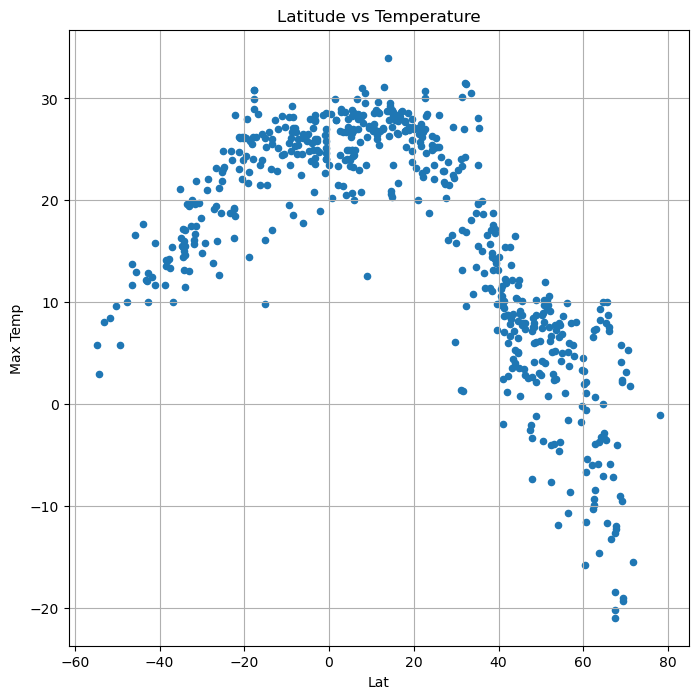

In [16]:
# Build scatter plot for latitude vs. temperature
 # Create a scatter plot which compares MPG to horsepower

city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid =True, figsize =(8,8),title = "Latitude vs Temperature")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

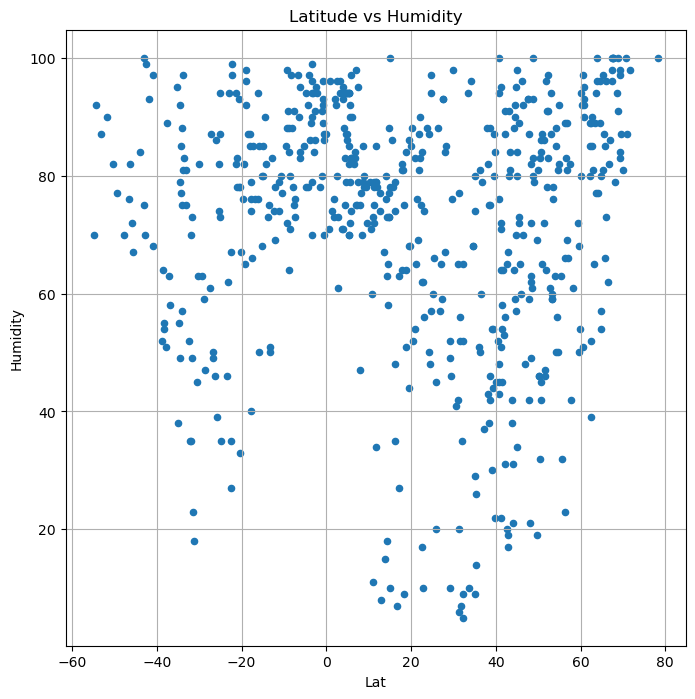

In [18]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid =True, figsize =(8,8),title = "Latitude vs Humidity")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

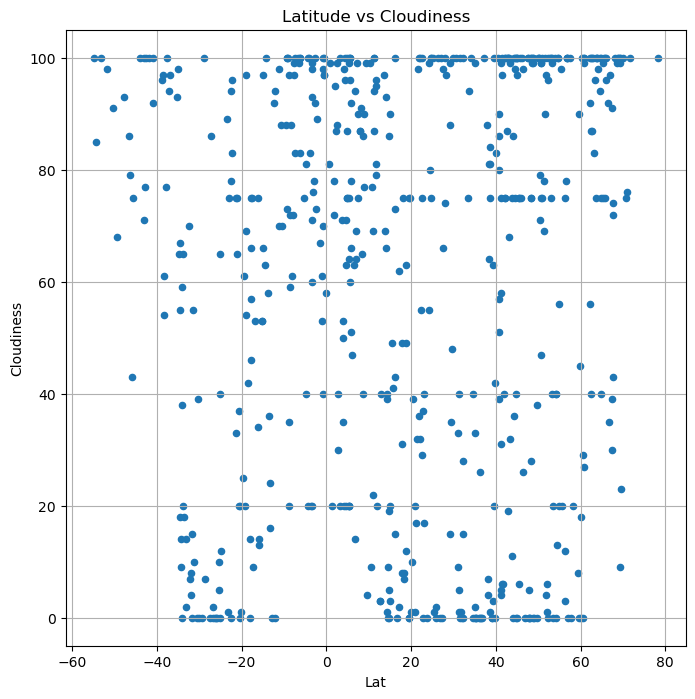

In [19]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid =True, figsize =(8,8),title = "Latitude vs Cloudiness")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

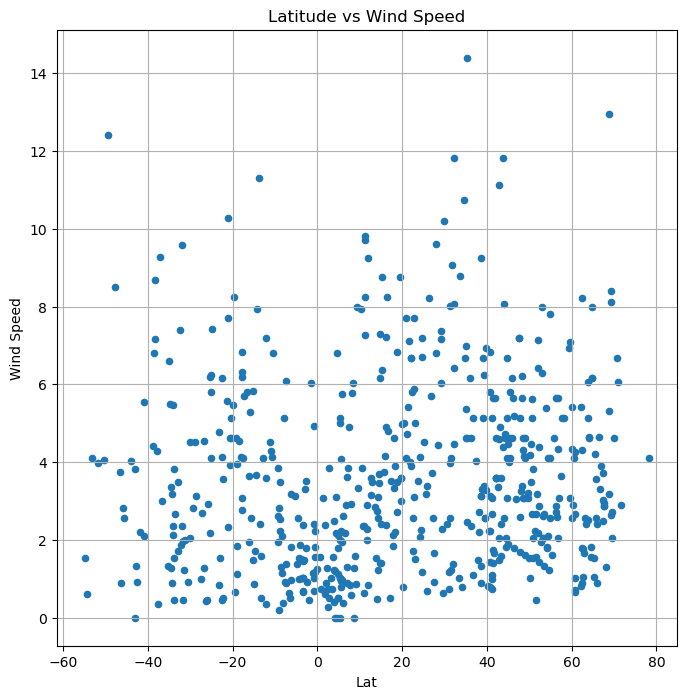

In [20]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid =True, figsize =(8,8),title = "Latitude vs Wind Speed")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
# Perform linear regression on each figure
#(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Possession"])
#regress_values= slope* mean_EPL_sum_df["Points"] + intercept
#line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

#plt.scatter(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Possession"],color='b')
#plt.plot(mean_EPL_sum_df["Points"], regress_values, color='r')
#plt.annotate(line_eq,(65,36))
#plt.xlabel("Points")
#plt.ylabel("Possession")
#plt.title("Points vs Possession")
#plt.show()

#print(f" r^2 = {round(rvalue**2,2)}")

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pudasjarvi,65.3833,26.9167,-3.50,97,99,1.04,FI,1681862213
4,severo-yeniseyskiy,60.3725,93.0408,-15.83,92,100,2.91,RU,1681862213
5,olonkinbyen,70.9221,-8.7187,1.71,87,76,6.07,SJ,1681862214
6,lihue,21.9789,-159.3672,22.71,87,100,6.69,US,1681862079
7,tazovsky,67.4667,78.7000,-12.71,96,91,3.71,RU,1681862214


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df  = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,15.41,63,94,9.28,SH,1681862213
2,flying fish cove,-10.4217,105.6791,27.20,77,70,6.80,CX,1681862213
3,adamstown,-25.0660,-130.1015,24.86,73,65,6.24,PN,1681862213
14,invercargill,-46.4000,168.3500,11.68,82,79,0.89,NZ,1681862215
16,puerto natales,-51.7236,-72.4875,8.44,90,98,3.97,CL,1681862215


In [37]:
city_data_df.isnull().values.any()
check_df

True

###  Temperature vs. Latitude Linear Regression Plot

In [27]:
(slope, intercept, rvalue, pvalue, stderr)= linregress(city_data_df["Lat"], city_data_df["Max Temp"])
regress_values= slope* city_data_df["Lat"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

 r^2 = 0.37


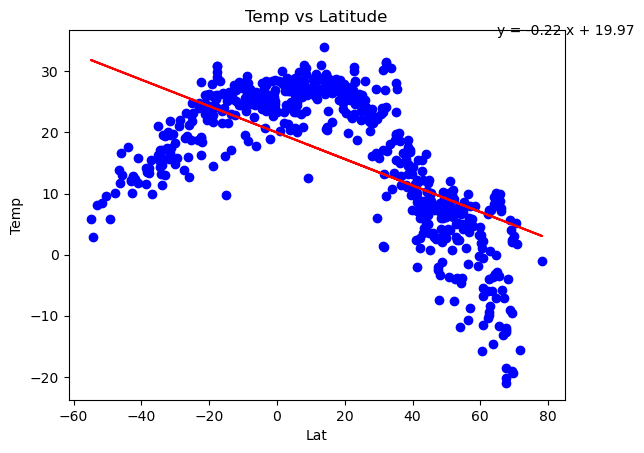

In [28]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],color='b')
plt.plot(city_data_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Lat")
plt.ylabel("Temp")
plt.title("Temp vs Latitude")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

In [38]:
(slope, intercept, rvalue, pvalue, stderr)= linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values= slope* northern_hemi_df["Lat"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

 r^2 = 0.77


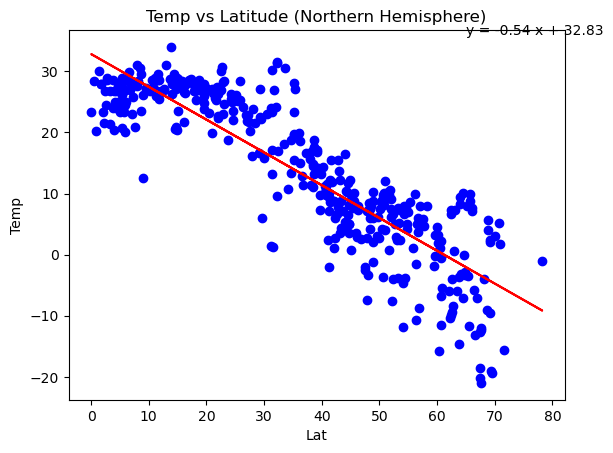

In [39]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],color='b')
plt.plot(northern_hemi_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Lat")
plt.ylabel("Temp")
plt.title("Temp vs Latitude (Northern Hemisphere)")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

 r^2 = 0.65


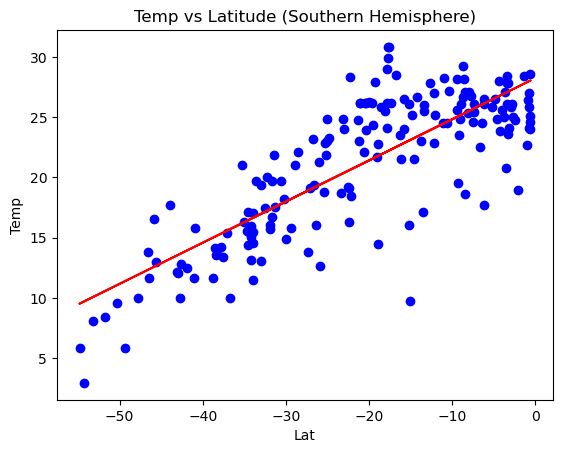

In [40]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr)= linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values= slope* southern_hemi_df["Lat"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],color='b')
plt.plot(southern_hemi_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Lat")
plt.ylabel("Temp")
plt.title("Temp vs Latitude (Southern Hemisphere)")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

 r^2 = 0.0


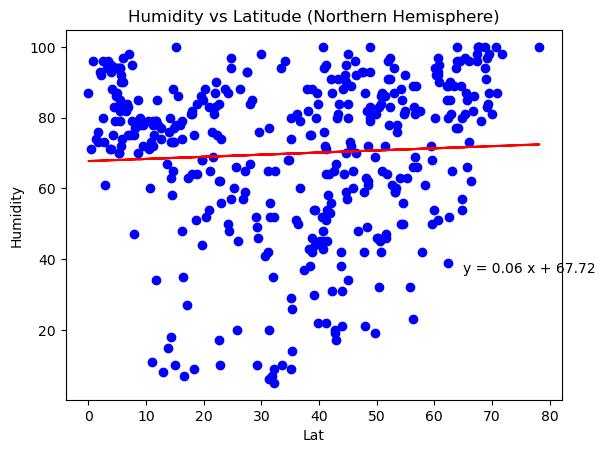

In [42]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr)= linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values= slope* northern_hemi_df["Lat"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],color='b')
plt.plot(northern_hemi_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude (Northern Hemisphere)")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

 r^2 = 0.08


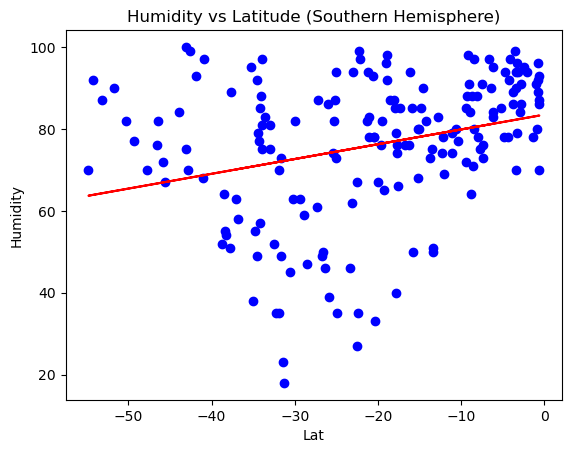

In [43]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr)= linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values= slope* southern_hemi_df["Lat"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],color='b')
plt.plot(southern_hemi_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude (Southern Hemisphere)")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

 r^2 = 0.01


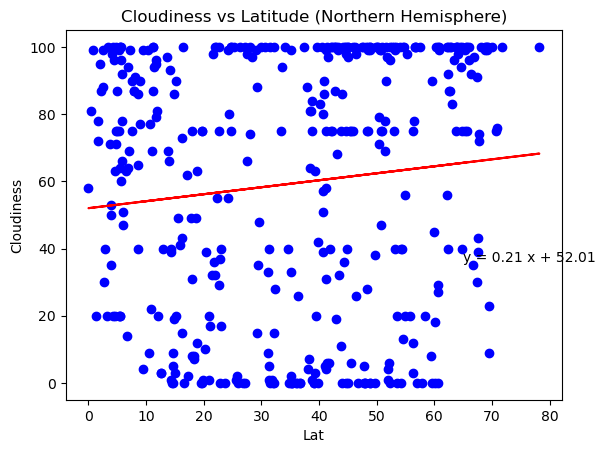

In [44]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr)= linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values= slope* northern_hemi_df["Lat"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],color='b')
plt.plot(northern_hemi_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude (Northern Hemisphere)")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

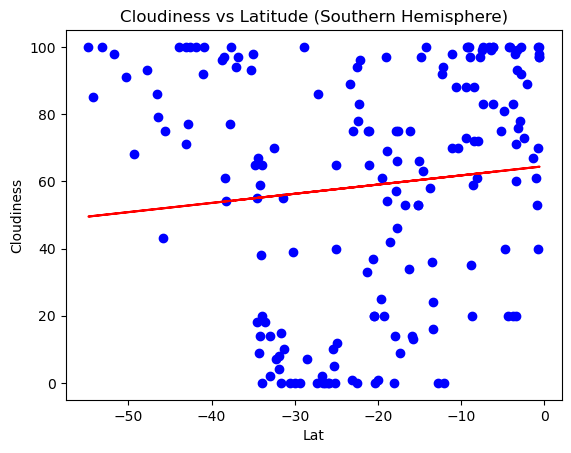

 r^2 = 0.01


In [45]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr)= linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values= slope* southern_hemi_df["Lat"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],color='b')
plt.plot(southern_hemi_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude (Southern Hemisphere)")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

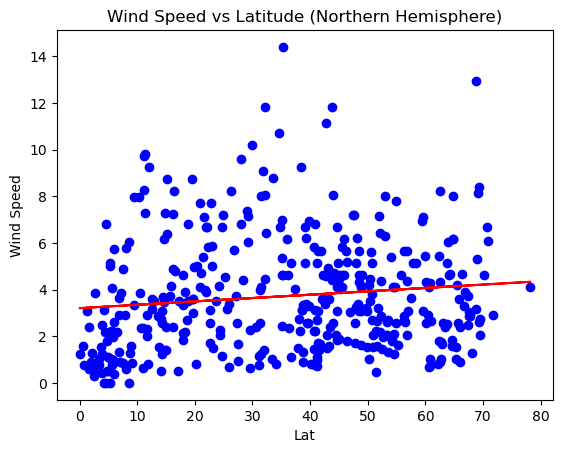

 r^2 = 0.01


In [46]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr)= linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values= slope* northern_hemi_df["Lat"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],color='b')
plt.plot(northern_hemi_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude (Northern Hemisphere)")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

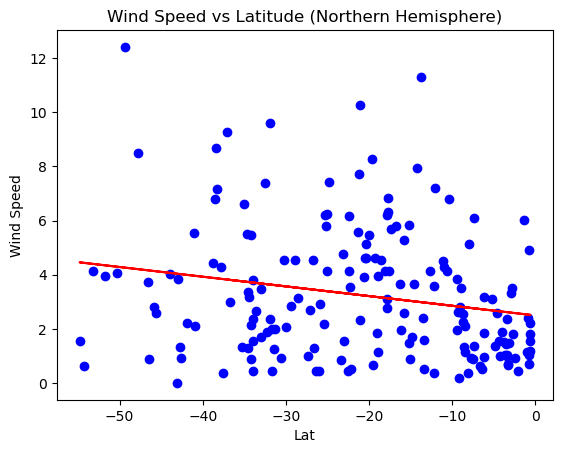

 r^2 = 0.04


In [48]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr)= linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values= slope* southern_hemi_df["Lat"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],color='b')
plt.plot(southern_hemi_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude (Northern Hemisphere)")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE